In [1]:
import os
from typing import List, Dict, Any
import pandas as pd 

In [2]:
from langchain_text_splitters import (
    RecursiveCharacterTextSplitter,
    CharacterTextSplitter,
    TokenTextSplitter
)
print("setup Done")

c:\Users\palas\Desktop\langchain\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


setup Done


In [11]:

text = """LMachine Learning Basics

Machine learning is a subset of artificial intelligence that enables systems to learn and improve
from experience without being explicitly programmed. It focuses on developing computer programs
that can access data and use it to learn for themselves.

Types of Machine Learning:
1. Supervised Learning: Learning with labeled data
2. Unsupervised Learning: Finding patterns in unlabeled data
3. Reinforcement Learning: Learning through rewards and penalties

Applications include image recognition, speech processing, and recommendation systems


    """


In [12]:
splitter = CharacterTextSplitter(
    chunk_size = 50,
    chunk_overlap = 10
)

chunks = splitter.split_text(text)
# print(chunks)
for i in chunks:
    print(i)

Created a chunk of size 250, which is longer than the specified 50
Created a chunk of size 204, which is longer than the specified 50
Created a chunk of size 85, which is longer than the specified 50


LMachine Learning Basics
Machine learning is a subset of artificial intelligence that enables systems to learn and improve
from experience without being explicitly programmed. It focuses on developing computer programs
that can access data and use it to learn for themselves.
Types of Machine Learning:
1. Supervised Learning: Learning with labeled data
2. Unsupervised Learning: Finding patterns in unlabeled data
3. Reinforcement Learning: Learning through rewards and penalties
Applications include image recognition, speech processing, and recommendation systems


chunk size = The maximum size of each text chunk after splitting.
chunk overlap = Number of characters/tokens repeated from the previous chunk.

Why overlap is needed:

Prevents loss of context

Helps LLM understand continuity

🧩 How to define good values (IMPORTANT)
✅ Recommended values (RAG projects)
Use Case	chunk_size	chunk_overlap
PDFs / Docs	800–1000	150–200
Articles	500–800	   100
Chat logs	300–500	50
Token-based splitting	200–400 tokens	20–50
❌ Common mistakes

❌ Very small chunk_size → poor context
❌ Zero overlap → broken meaning
❌ Very large chunks → token overflow



❌ Problem

Can break sentences mid-way

Context may be lost

✔ Use when

Simple text

Speed matters more than structure

In [ ]:
# recursive
# RecursiveCharacterTextSplitter is a smart text splitter in LangChain that breaks large text into chunks while preserving meaning (sentences & paragraphs).
splitter = RecursiveCharacterTextSplitter(chunk_size = 80, chunk_overlap=20)
chunks = splitter.split_text(text)
for i in chunks:
    print(i)

LMachine Learning Basics
Machine learning is a subset of artificial intelligence that enables systems to
enables systems to learn and improve
from experience without being explicitly programmed. It focuses on developing
on developing computer programs
that can access data and use it to learn for themselves.
Types of Machine Learning:
1. Supervised Learning: Learning with labeled data
2. Unsupervised Learning: Finding patterns in unlabeled data
3. Reinforcement Learning: Learning through rewards and penalties
Applications include image recognition, speech processing, and recommendation
and recommendation systems


1️⃣ First: What is a token?

In very simple words:

A token is a small piece of text that the AI model reads.

It can be:

a whole word

part of a word

punctuation

space + word

🧠 Example 1
imple meaning:

TokenTextSplitter splits text so that each chunk contains a fixed number of tokens.
6️⃣ When should YOU use TokenTextSplitter?

👉 Use ONLY when:

Model has strict token limit

You get token overflow errors

You want full control over token count

👉 Otherwise:

Use RecursiveCharacterTextSplitter




######in token even the white space are ounted 

In [14]:
# text loader
from langchain_community.document_loaders import TextLoader



In [15]:
import os
os.makedirs("newdata/samplefile", exist_ok=True)

In [20]:
sample_texts={
    "newdata/samplefile/python_intro.txt":"""Python Programming Introduction

Python is a high-level, interpreted programming language known for its simplicity and readability.
Created by Guido van Rossum and first released in 1991, Python has become one of the most popular
programming languages in the world.

Key Features:
- Easy to learn and use
- Extensive standard library
- Cross-platform compatibility
- Strong community support

Python is widely used in web development, data science, artificial intelligence, and automation.""",
    
    "newdata/samplefile/machine_learning.txt": """Machine Learning Basics

Machine learning is a subset of artificial intelligence that enables systems to learn and improve
from experience without being explicitly programmed. It focuses on developing computer programs
that can access data and use it to learn for themselves.

Types of Machine Learning:
1. Supervised Learning: Learning with labeled data
2. Unsupervised Learning: Finding patterns in unlabeled data
3. Reinforcement Learning: Learning through rewards and penalties

Applications include image recognition, speech processing, and recommendation systems
    
    
    """

}


# for filepath, content in sample_texts.items():
#     with open(filepath, 'w', encoding="utf-8") as f:
#         f.write(content)

for filepath,content in sample_texts.items():
    with open(filepath,'w',encoding="utf-8") as f:
        f.write(content)

print("✅ Sample text files created!")
print("data created")

✅ Sample text files created!
data created


In [ ]:
# textLoader fetching only tye one file
from langchain_community.document_loaders import TextLoader

loader = TextLoader("newdata/samplefile/python_intro.txt", encoding="utf-8")

documents = loader.load()

print(documents)
print(type(documents))
print(documents[0].metadata)






[Document(metadata={'source': 'newdata/samplefile/python_intro.txt'}, page_content='Python Programming Introduction\n\nPython is a high-level, interpreted programming language known for its simplicity and readability.\nCreated by Guido van Rossum and first released in 1991, Python has become one of the most popular\nprogramming languages in the world.\n\nKey Features:\n- Easy to learn and use\n- Extensive standard library\n- Cross-platform compatibility\n- Strong community support\n\nPython is widely used in web development, data science, artificial intelligence, and automation.')]
<class 'list'>
{'source': 'newdata/samplefile/python_intro.txt'}


In [ ]:
# this is for loading multiple files
from langchain_community.document_loaders import DirectoryLoader

dir_loader = DirectoryLoader(
    "newdata/samplefile",
    glob="**/*.txt",
    loader_cls=
        
)

In [33]:
text =  documents[0].page_content
print(text)

Python Programming Introduction

Python is a high-level, interpreted programming language known for its simplicity and readability.
Created by Guido van Rossum and first released in 1991, Python has become one of the most popular
programming languages in the world.

Key Features:
- Easy to learn and use
- Extensive standard library
- Cross-platform compatibility
- Strong community support

Python is widely used in web development, data science, artificial intelligence, and automation.


In [ ]:
# Method 1: Character-based splitting
print("1️⃣ CHARACTER TEXT SPLITTER")
char_splitter = CharacterTextSplitter(
    separator=" ",  # Split on newlines
    chunk_size=200,  # Max chunk size in characters
    chunk_overlap=20,  # Overlap between chunks
    length_function=len  # How to measure chunk size
)

char_chunks=char_splitter.split_text(text)
print(f"Created {len(char_chunks)} chunks")
print(f" {char_chunks[0]}")
print("second")
print(f" {char_chunks[1]}")
print("third")
print(f"{char_chunks[2]}")

1️⃣ CHARACTER TEXT SPLITTER
Created 3 chunks
 Python Programming Introduction
Python is a high-level, interpreted programming language known for its simplicity and readability.
second
 Created by Guido van Rossum and first released in 1991, Python has become one of the most popular
programming languages in the world.
Key Features:
- Easy to learn and use
- Extensive standard library
third
- Cross-platform compatibility
- Strong community support
Python is widely used in web development, data science, artificial intelligence, and automation.


In [43]:
# working on pdf 
from langchain_community.document_loaders import (
    PyPDFLoader, PyMuPDFLoader
)

In [ ]:
try:
    loader = PyPDFLoader("1_dataingestion/data/pdf/attention.pdf")
    docs = loader.load()
    # print(docs)
    print(f"page 1 content : {docs[0].page_content[:100]}")
except Exception as e:
    print(f"got an error : {e}")

[Document(metadata={'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-04-10T21:11:43+00:00', 'author': '', 'keywords': '', 'moddate': '2024-04-10T21:11:43+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': '1_dataingestion/data/pdf/attention.pdf', 'total_pages': 15, 'page': 0, 'page_label': '1'}, page_content='Provided proper attribution is provided, Google hereby grants permission to\nreproduce the tables and figures in this paper solely for use in journalistic or\nscholarly works.\nAttention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.com\nNoam Shazeer∗\nGoogle Brain\nnoam@google.com\nNiki Parmar∗\nGoogle Research\nnikip@google.com\nJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research\nllion@google.com\nAidan N. Gomez∗ †\nUniversity of Toronto\naidan@cs.toronto.edu\nŁukasz Kaise

In [49]:
# PyMuPDFLoader
try:
    loader = PyMuPDFLoader("1_dataingestion/data/pdf/attention.pdf")
    docs = loader.load()
    print(docs[0].page_content)

except Exception as e:
    print(f"got an error : {e}")

Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and figures in this paper solely for use in journalistic or
scholarly works.
Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.com
Noam Shazeer∗
Google Brain
noam@google.com
Niki Parmar∗
Google Research
nikip@google.com
Jakob Uszkoreit∗
Google Research
usz@google.com
Llion Jones∗
Google Research
llion@google.com
Aidan N. Gomez∗†
University of Toronto
aidan@cs.toronto.edu
Łukasz Kaiser∗
Google Brain
lukaszkaiser@google.com
Illia Polosukhin∗‡
illia.polosukhin@gmail.com
Abstract
The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks that include an encoder and a decoder. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer,
based solely on attention mechanisms, dispensing with recurrence and convolutions
entirely. Exper

In [51]:
# challenges
raw_pdf_text = """Company Financial Report


    The ﬁnancial performance for ﬁscal year 2024
    shows signiﬁcant growth in proﬁtability.
    
    
    
    Revenue increased by 25%.
    
The company's efﬁciency improved due to workﬂow
optimization.


Page 1 of 10
"""

def clean(text):
    text = " ".join(text.split())

    text = text.replace("ﬁ", "fi")
    text = text.replace("ﬂ", "fl")

    return text

print("before")
print(raw_pdf_text)
print("after")
res = clean(raw_pdf_text)
print(res)

before
Company Financial Report


    The ﬁnancial performance for ﬁscal year 2024
    shows signiﬁcant growth in proﬁtability.
    
    
    
    Revenue increased by 25%.
    
The company's efﬁciency improved due to workﬂow
optimization.


Page 1 of 10

after
Company Financial Report The financial performance for fiscal year 2024 shows significant growth in profitability. Revenue increased by 25%. The company's efficiency improved due to workflow optimization. Page 1 of 10


Commom pdf error


In [ ]:
from typing import List
from langchain_core.documents import Document

class SmartPDFProcessor:

    def __init__(self, chunk_size=1000, chunk_overlap=100):
        self.chunk_size=chunk_size
        self.chunk_overlap = chunk_overlap
        self.text_splitter = RecursiveCharacterTextSplitter(
            chunk_size = chunk_size,
            chunk_overlap  = chunk_overlap,
            separators=[" "],
        )
        
    
    def process_pdf(self, pdf_path:str) ->List[Document]:
        # 
        loader = PyPDFLoader(pdf_path)
        pages = loader.load()
        # print(pages)
        # return pages
        for page_num, page in enumerate(pages):
            # cleaning the text
            cleaned_text = self._clean_text(page.page_content)
            # print(cleaned_text)
            if len(cleaned_text.strip()) < 50:
                continue
            

    def _clean_text(self, text: str) -> str:
        """Clean extracted text"""
        # Remove excessive whitespace
        text = " ".join(text.split())
        
        # Fix common PDF extraction issues
        text = text.replace("ﬁ", "fi")
        text = text.replace("ﬂ", "fl")
        
        return text


In [76]:
preprocessor=SmartPDFProcessor()

In [77]:
smart_chunks=preprocessor.process_pdf("1_dataingestion/data/pdf/attention.pdf")
# print(smart_chunks[0].page_content)

Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works. Attention Is All You Need Ashish Vaswani∗ Google Brain avaswani@google.com Noam Shazeer∗ Google Brain noam@google.com Niki Parmar∗ Google Research nikip@google.com Jakob Uszkoreit∗ Google Research usz@google.com Llion Jones∗ Google Research llion@google.com Aidan N. Gomez∗ † University of Toronto aidan@cs.toronto.edu Łukasz Kaiser∗ Google Brain lukaszkaiser@google.com Illia Polosukhin∗ ‡ illia.polosukhin@gmail.com Abstract The dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We propose a new simple network architecture, the Transformer, based solely on attention mechanisms, dispensing with recurrence and convolutions entirely. Exp

In [ ]:
try:
    
    smart_chunks = preprocessor.process_pdf("1_dataingestion/data/pdf/attention.pdf")
    
except  Exception as e:
    print(f"hot an error : {e}")

IndentationError: expected an indented block after 'try' statement on line 1 (1399796042.py, line 3)

In [ ]:
print

word data Parsing


In [79]:
from langchain_community.document_loaders import Docx2txtLoader, UnstructuredWordDocumentLoader


In [81]:
!pip install docx2txt


In [83]:
try:
    docx_loader = Docx2txtLoader("1_dataingestion/data/word_files/proposal.docx")
    doc = docx_loader.load()
    print(doc[0].page_content)
except Exception as e:
    print(f"got an error : {e}")

Project Proposal: RAG Implementation

Executive Summary

This proposal outlines the implementation of a Retrieval-Augmented Generation system for our organization.

Objectives

Key objectives include:

• Improve information retrieval accuracy

• Reduce response time for customer queries

• Integrate with existing knowledge base

Budget and Timeline

Budget: $50,000

Timeline: 3 months

Team: 4 developers, 1 project manager

Technical Requirements

Required technologies:

- Python 3.8+

- OpenAI API access

- Vector database (ChromaDB)

- 16GB RAM minimum

Project Phases

Phase

Duration

Deliverables

Research

2 weeks

Technology evaluation report

Development

8 weeks

Working RAG prototype

Testing

2 weeks

Performance benchmarks


In [ ]:
# 

In [4]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------- ------------------------- 2.9/8.1 MB 14.0 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 15.4 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 13.2 MB/s  0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 16.3 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   -------------- ------------------------- 2.6/7.0 MB 15.1 MB/s eta 0:00:01
   -------------------- ------------------- 3.7/7.0 MB 11.5 MB/s eta 0:00:01
   ---------------------- ----------------- 3.9/7.0 MB 9.4 MB/s eta 0:00:01
   ------------------------- -------------- 4.5/7.0 MB 5.4 MB/s eta 0:00:01
   -------------------------------- ------- 5.8/7.0 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 5.8 MB/s  0:00:01

   --------------------------------

Embedding visualization


In [5]:
import numpy as np
import matplotlib.pyplot as plt



In [6]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

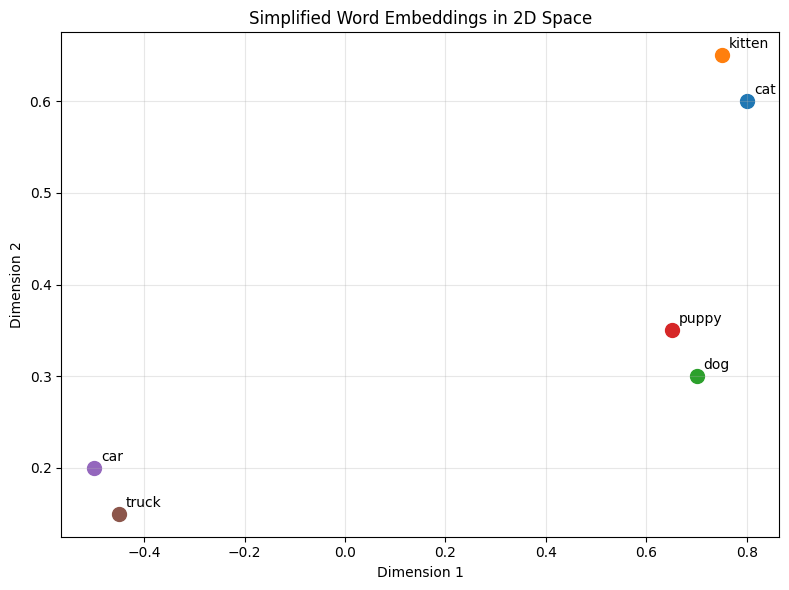

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5, 5), 
                textcoords='offset points')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_title('Simplified Word Embeddings in 2D Space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

measuring similarity

In [ ]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """

    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec1)
    return dot_product/ (norm_a * norm_b)

creating our first embedding


In [11]:
from langchain_huggingface import HuggingFaceEmbeddings


In [1]:
from sentence_transformers import SentenceTransformer

c:\Users\palas\Desktop\GenAI\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [7]:
model = SentenceTransformer("all-MiniLM-L6-v2")

## Sample text
text="""
LangChain is a framework for building applications with LLMs.
Langchain provides modular abstractions to combine LLMs with tools like OpenAI and Pinecone.
You can create chains, agents, memory, and retrievers.
The Eiffel Tower is located in Paris.
France is a popular tourist destination.
"""


sentences  = [s.strip() for s in text.split("\n") if s.strip()]

embeddings = model.encode(sentences)
# print(sentences)
# print(embeddings)

threshold = 0.7
chunks = []
current_chunk = [sentences[0]]

for i in range(1, len(sentences)):
    sim = cosine_similarity(
        [embeddings[i-1]],
        [embeddings[i]]
    )[0][0]
    if sim>=threshold:
        current_chunk.append(sentences[i])
    else:
        chunks.append(" ".join(current_chunk))
        current_chunk=[sentences[i]]


chunks.append(" ".join(current_chunk))

    # Output the chunks
print("\n📌 Semantic Chunks:")
for idx, chunk in enumerate(chunks):
    print(f"\nChunk {idx+1}:\n{chunk}")







📌 Semantic Chunks:

Chunk 1:
LangChain is a framework for building applications with LLMs. Langchain provides modular abstractions to combine LLMs with tools like OpenAI and Pinecone.

Chunk 2:
You can create chains, agents, memory, and retrievers.

Chunk 3:
The Eiffel Tower is located in Paris.

Chunk 4:
France is a popular tourist destination.


In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
# from langchain.schema import Document
from langchain_core.documents import Document
# from langchain.vectorstores import FAISS
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain.chat_models import init_chat_model
# from langchain.schema.runnable import RunnableLambda, RunnableMap
from langchain_core.runnables import RunnableLambda, RunnableMap

# from langchain.prompts import PromptTemplate
from langchain_core.prompts import PromptTemplate

from langchain_core.output_parsers import StrOutputParser
import os
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [6]:
### Custom Semantic Chunker With Threshold

class ThresholdSematicChunker:
    def __init__(self,model_name="all-MiniLM-L6-v2",threshold=0.7):
        self.model=SentenceTransformer(model_name)
        self.threshold=threshold 

    def split(self, text: str):
        sentences = [s.strip() for s in text.split('.') if s.strip()]
        embeddings = self.model.encode(sentences)
        chunks = []
        current_chunk = [sentences[0]]

        for i in range(1, len(sentences)):
            sim = cosine_similarity([embeddings[i - 1]], [embeddings[i]])[0][0]
            if sim >= self.threshold:
                current_chunk.append(sentences[i])
            else:
                chunks.append(". ".join(current_chunk) + ".")
                current_chunk = [sentences[i]]

        chunks.append(". ".join(current_chunk) + ".")
        return chunks
    
    def split_documents(self,docs):
        result=[]
        for doc in docs:
            for chunk in self.split(doc.page_content):
                result.append(Document(page_content=chunk, metadata=doc.metadata))

        return result
# split() chunks plain text by meaning, while split_documents() chunks LangChain Documents by meaning and keeps their metadata for RAG use.
    

In [7]:
# Sample text
sample_text = """
LangChain is a framework for building applications with LLMs.
Langchain provides modular abstractions to combine LLMs with tools like OpenAI and Pinecone.
You can create chains, agents, memory, and retrievers.
The Eiffel Tower is located in Paris.
France is a popular tourist destination.
"""

doc = Document(page_content=sample_text)
doc

Document(metadata={}, page_content='\nLangChain is a framework for building applications with LLMs.\nLangchain provides modular abstractions to combine LLMs with tools like OpenAI and Pinecone.\nYou can create chains, agents, memory, and retrievers.\nThe Eiffel Tower is located in Paris.\nFrance is a popular tourist destination.\n')

In [8]:
### Chunking
chunker=ThresholdSematicChunker(threshold=0.7)
chunks=chunker.split_documents([doc])
chunks

[Document(metadata={}, page_content='LangChain is a framework for building applications with LLMs. Langchain provides modular abstractions to combine LLMs with tools like OpenAI and Pinecone.'),
 Document(metadata={}, page_content='You can create chains, agents, memory, and retrievers.'),
 Document(metadata={}, page_content='The Eiffel Tower is located in Paris.'),
 Document(metadata={}, page_content='France is a popular tourist destination.')]

In [10]:
### VectorStore
import os
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
embedding=OpenAIEmbeddings()
vectorstore=FAISS.from_documents(chunks,embedding)
retriever=vectorstore.as_retriever()



APITimeoutError: Request timed out.

In [2]:
# from langchain_community.vectorstores import FAISS
# from langchain_huggingface import HuggingFaceEmbeddings
# from langchain_community.retrievers import BM25Retriever
# # from langchain.retrievers import EnsembleRetriever
# from langchain_community.retrievers import EnsembleRetriever

# # from langchain.schema import Document
# from langchain_core.documents import Document



from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_community.retrievers import BM25Retriever

from langchain_core.documents import Document

In [6]:
# from langchain.retrievers import EnsembleRetriever        # use this
# from langchain_core.retrievers import EnsembleRetriever     # or this


from langchain.retrievers.ensemble import EnsembleRetriever


ModuleNotFoundError: No module named 'langchain.retrievers'